In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
label_encoder = preprocessing.LabelEncoder() 

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   9999 non-null   object 
 9   data10  9999 non-null   object 
 10  output  9999 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [4]:
train_data.dropna(axis = 0, inplace = True)

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   9993 non-null   int64  
 1   data2   9993 non-null   int64  
 2   data3   9993 non-null   int32  
 3   data4   9993 non-null   float64
 4   data5   9993 non-null   float64
 5   data6   9993 non-null   float64
 6   data7   9993 non-null   float64
 7   data8   9993 non-null   float64
 8   data9   9993 non-null   int32  
 9   output  9993 non-null   float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 780.7 KB


In [5]:
train_data['data3']= label_encoder.fit_transform(train_data['data3']) 
train_data['data9']= label_encoder.fit_transform(train_data['data9'])
train_data['data10']= label_encoder.fit_transform(train_data['data10']) 

test_data['data3']= label_encoder.fit_transform(test_data['data3']) 
test_data['data9']= label_encoder.fit_transform(test_data['data9'])
test_data['data10']= label_encoder.fit_transform(test_data['data10']) 

In [6]:
train_data.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1,0,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,1,0,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,1,0,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,1,0,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,1,0,64.925051


In [7]:
train_data.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
output    0
dtype: int64

In [8]:
np.any(np.isnan(train_data))

False

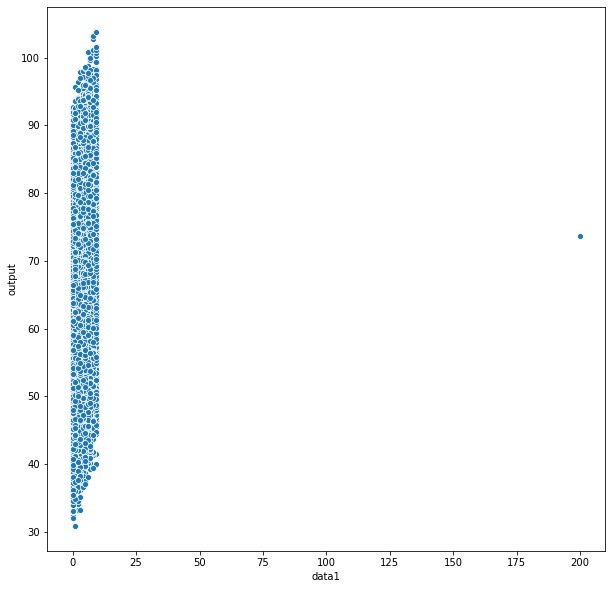

In [9]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_data['data1'], y = train_data['output'])

In [10]:
i = train_data.loc[train_data['data1'] > 75].index
print(i)
train_data.drop(i, inplace = True)

Int64Index([18], dtype='int64')


In [11]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [12]:
#_ = train_data['data1'].value_counts().plot(kind='bar')
#plt.show()

In [13]:
#_ = train_data['data3'].value_counts().plot(kind='bar')
#plt.show()

In [14]:
#_ = train_data['data8'].value_counts().plot(kind='bar')
#plt.show()

In [15]:
#_ = train_data['data9'].value_counts().plot(kind='bar')
#plt.show()

In [16]:
#_ = train_data['data10'].value_counts().plot(kind='bar')
#plt.show()

In [17]:
#_ = train_data['data1'].value_counts().plot(kind='bar')
#plt.show()

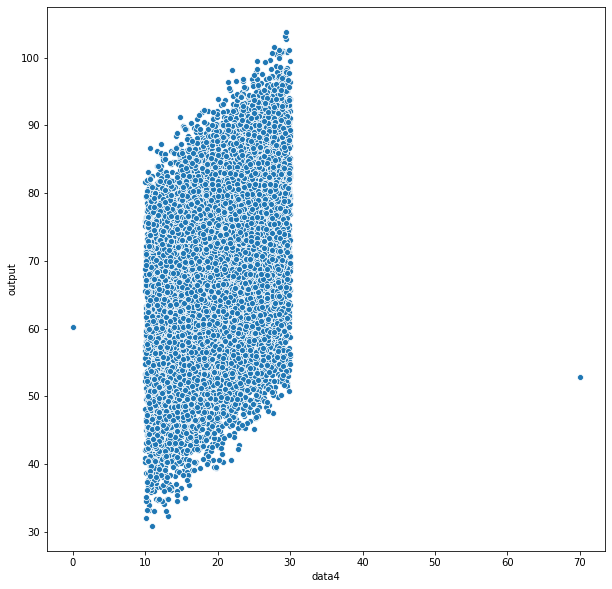

In [18]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_data['data4'], y = train_data['output'])

In [19]:
i = train_data.loc[train_data['data4'] > 50].index
print(i)
train_data.drop(i, inplace = True)

i = train_data.loc[train_data['data4'] < 10].index
print(i)
train_data.drop(i, inplace = True)

Int64Index([33], dtype='int64')
Int64Index([81], dtype='int64')


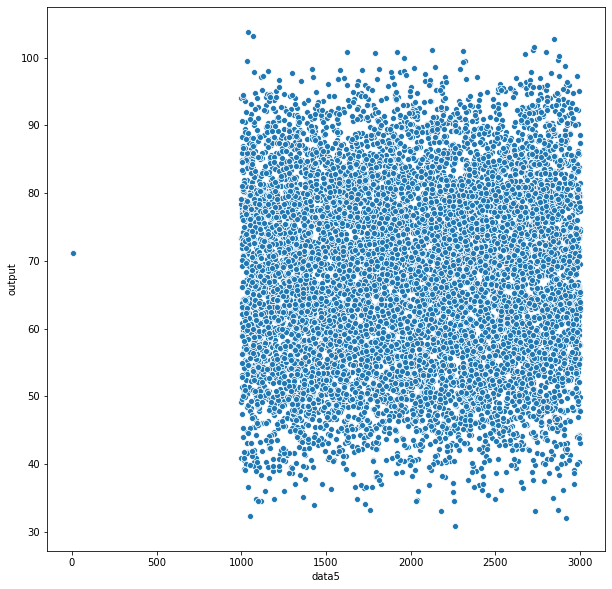

In [20]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_data['data5'], y = train_data['output'])

In [21]:
i = train_data.loc[train_data['data5'] < 500].index
print(i)
train_data.drop(i, inplace = True)

Int64Index([46], dtype='int64')


In [22]:
del train_data["data10"]
del test_data["data10"]

In [23]:
train_data

,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,1,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,1,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,1,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,1,64.925051
...,...,...,...,...,...,...,...,...,...,...
9995,9,263,0,16.604215,1070.0,0.0,8.979149,2.0,0,85.922943
9996,5,280,4,28.758911,2652.0,0.0,3.574129,0.0,0,90.857149
9997,6,188,3,15.963267,1359.0,0.0,2.880019,0.0,0,61.246960
9998,1,132,7,11.683401,1793.0,0.0,6.983192,2.0,0,45.298253


In [24]:
X = train_data.drop(['output'], axis = 1, inplace = False)
y = train_data['output']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7494, 9) (2499, 9) (7494,) (2499,)


In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
1643,78.109018,78.109018
1348,47.901732,47.901732
3425,76.584313,76.584313
1352,70.346561,70.346561
8078,81.167425,81.167425
...,...,...
6890,84.012346,84.012346
4290,87.815740,87.815740
6079,56.005503,56.005503
1496,71.101392,71.101392


In [28]:
r2_score(y_test, y_pred)

1.0

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [31]:
y_pred = knn.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
1643,78.109018,76.264837
1348,47.901732,45.902519
3425,76.584313,79.293530
1352,70.346561,68.610158
8078,81.167425,81.364960
...,...,...
6890,84.012346,76.169109
4290,87.815740,85.489490
6079,56.005503,64.260350
1496,71.101392,72.483038


In [32]:
r2_score(y_test, y_pred)

0.8424354504022746